In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

In [2]:
# Function to plot the Gaussian components (ellipses)
def plot_gaussian_ellipses(gmm, ax):
    for i in range(gmm.n_components):
        mean = gmm.means_[i]
        cov = gmm.covariances_[i]

        # Find the principal axes by performing eigen-decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(cov)
        order = eigenvalues.argsort()[::-1]
        eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]

        # Compute angle of ellipse in degrees
        angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))

        # Width and height of the ellipse (2 standard deviations)
        width, height = 2 * np.sqrt(eigenvalues)

        # Create and add the ellipse to the plot
        ellipse = Ellipse(mean, width, height, angle, edgecolor='black', facecolor='none', linestyle='--')
        ax.add_patch(ellipse)

In [3]:
# Generate data samples
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [4]:
X1.shape

(1000, 2)

In [5]:
X2.shape

(250, 2)

In [20]:
# # Generate data samples
# X, y = make_blobs(n_samples=1250, centers=((4, -4, 4), (0, 0, 0), (6, -8, 6)), random_state=42)
# X = X.dot(np.array([[0.374, 0.95], [0.732, 0.598], [0.832, 0.798]]))


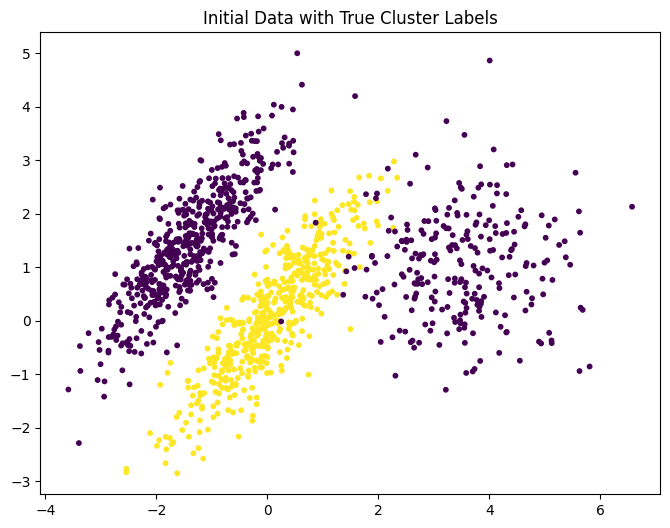

In [21]:
# Part 1: Plot initial data with true cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='viridis')
plt.title('Initial Data with True Cluster Labels')
plt.show()

In [22]:
# Build the GMM model with Number of Gaussian components = 3
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [23]:
# Print weights, means, and covariances
print("Weights:", gm.weights_)
print("Means:", gm.means_)
print("Covariances:", gm.covariances_)

# Check if the model is converged
print("Converged?", gm.converged_)

# Print the number of iterations
print("Number of Iterations:", gm.n_iter_)

# Predict the labels for X
labels = gm.predict(X)

Weights: [0.40005972 0.20961444 0.39032584]
Means: [[-1.40764129  1.42712848]
 [ 3.39947665  1.05931088]
 [ 0.05145113  0.07534576]]
Covariances: [[[ 0.63478217  0.72970097]
  [ 0.72970097  1.16094925]]

 [[ 1.14740131 -0.03271106]
  [-0.03271106  0.95498333]]

 [[ 0.68825143  0.79617956]
  [ 0.79617956  1.21242183]]]
Converged? True
Number of Iterations: 4


Text(0.5, 1.0, 'GMM Clusters with Gaussian Distributions')

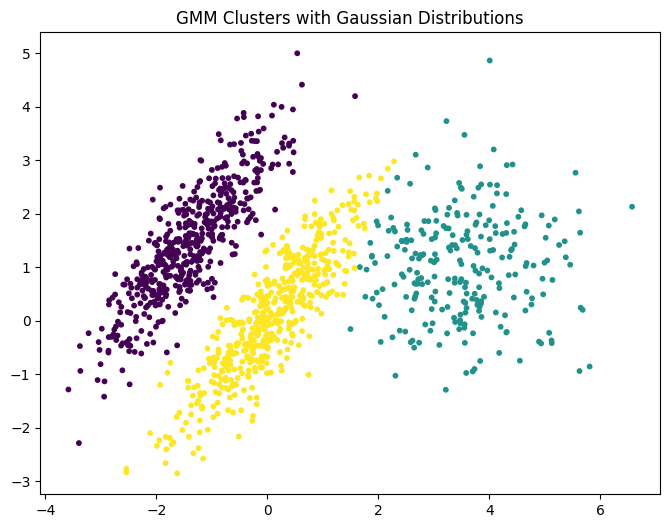

In [24]:
# Part 2: Plot data with GMM predicted clusters and Gaussian distributions
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis')
plt.title('GMM Clusters with Gaussian Distributions')

Generated new points:
 [[-2.32491052  1.04752548]
 [-1.16654983  1.62795173]
 [-2.80148354 -0.09038255]
 [ 3.98304484  1.49869936]
 [ 3.8163406   0.53038367]
 [ 2.83900936 -0.73774786]
 [ 5.13730571  0.21659003]
 [ 4.52233102  1.18402449]
 [ 1.14647758  0.78191449]
 [-1.03636845 -1.55694756]]
Generated new labels:
 [0 0 0 1 1 1 1 1 2 2]


<ipython-input-18-b0c78e9cd9dc>:19: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = Ellipse(mean, width, height, angle, edgecolor='black', facecolor='none', linestyle='--')


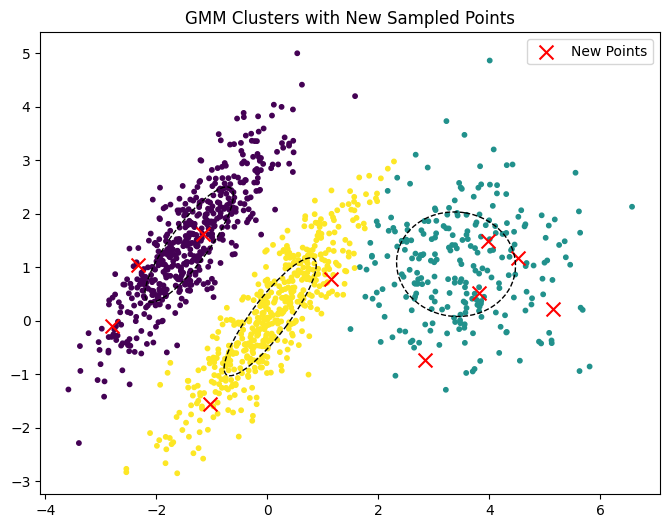

In [25]:
# Generate 6 new sample points from the GMM
X_new, y_new = gm.sample(10)
print("Generated new points:\n", X_new)
print("Generated new labels:\n", y_new)

# Plot the new points on the same plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis')
plt.scatter(X_new[:, 0], X_new[:, 1], c='red', s=100, label='New Points', marker='x')
plt.title('GMM Clusters with New Sampled Points')
plot_gaussian_ellipses(gm, ax)
plt.legend()
plt.show()